In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
plt.rcParams['font.sans-serif']=['Microsoft Jhenghei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
df = pd.read_csv("../data/trainDRUG.csv", encoding='utf')

In [4]:
df.head()

,性別,教育,神智,年齡,每月採尿平均,實際保管長度,違規次數,獎勵次數,犯次,一年內次數,二年內次數,三年內次數,四年內次數,五年內次數,首犯年齡,再犯註記
0,1,4,3,3,2.333,1,0,0,5,0,0,0,3,4,0,0
1,1,3,2,3,0.000,1,0,0,2,0,0,0,1,0,0,0
2,1,3,2,3,1.000,3,0,2,4,0,0,0,0,0,1,0
3,1,3,0,4,1.714,1,0,0,5,0,0,0,0,0,1,1
4,1,3,0,3,0.871,4,0,1,2,0,0,0,0,0,0,0


In [5]:
X = df.drop(['再犯註記'], axis=1)
y = df['再犯註記']

In [24]:
st = time.time()
SRF = RandomForestClassifier(n_estimators=500, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('accuracy', 'f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean Accuracy %.4f' % mean(scores['test_accuracy']))
print('Mean f1: %.4f' % mean(scores['test_f1']))
print('Mean recall: %.4f' % mean(scores['test_recall']))
print('Mean precision: %.4f' % mean(scores['test_precision']))
et = time.time()
print("run time need %.4f" % (et-st))

Mean Accuracy 0.8388
Mean f1: 0.3642
Mean recall: 0.2627
Mean precision: 0.5943
run time need 670.1257


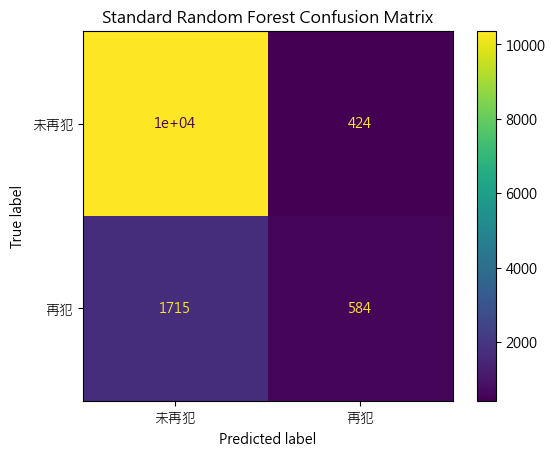

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#Train SRF
SRF.fit(X_train, y_train)
#SRF prediction result
y_pred = SRF.predict(X_test)
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm, display_labels=['未再犯', '再犯'])
fig.plot()
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

In [9]:
#***roc_auc curve for SRF***
from sklearn.metrics import roc_curve, auc, roc_auc_score
SRF = RandomForestClassifier(n_estimators=500, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
SRF.fit(X_train, y_train)
y_pred_proba = SRF.predict_proba(X_test)[:, 1]
y_pred = SRF.predict(X_test)
srf_fpr, srf_tpr, _ = roc_curve(y_test, y_pred_proba)
srf_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(srf_auc)

0.77


### Balanced Random Forest (BRF)

In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [29]:
st = time.time()
BRFC = BalancedRandomForestClassifier(n_estimators=500, 
                                      sampling_strategy='all',
                                      replacement = True,
                                      random_state=2)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('accuracy', 'f1', 'recall', 'precision')
#Evaluate BRFC model
scores = cross_validate(BRFC, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean accuracy: %.4f' % mean(scores['test_accuracy']))
print('Mean f1: %.4f' % mean(scores['test_f1']))
print('Mean recall: %.4f' % mean(scores['test_recall']))
print('Mean precision: %.4f' % mean(scores['test_precision']))
print("run time need %.4f" % (time.time()-st))

Mean accuracy: 0.7669
Mean f1: 0.4767
Mean recall: 0.6042
Mean precision: 0.3938
run time need 447.7250


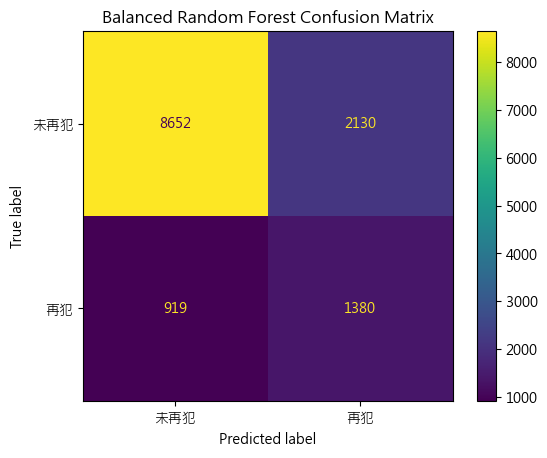

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#Train BRFC
BRFC.fit(X_train, y_train)
#BRFC prediction result
y_pred = BRFC.predict(X_test)
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm, display_labels=['未再犯', '再犯'])
fig.plot()
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

In [12]:
#***roc_auc curve for BRFC***

from imblearn.ensemble import BalancedRandomForestClassifier
BRFC = BalancedRandomForestClassifier(n_estimators=500, 
                                      sampling_strategy='all',
                                      replacement = True,
                                      random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
BRFC.fit(X_train, y_train)
y_pred_proba = BRFC.predict_proba(X_test)[:, 1]
y_pred = BRFC.predict(X_test)
bsrf_fpr, bsrf_tpr, _ = roc_curve(y_test, y_pred_proba)
bsrf_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(bsrf_auc)

0.7783


### SMOTE

Mean accuracy: 0.8561
Mean f1: 0.8573
Mean recall: 0.8647
Mean precision: 0.8501


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


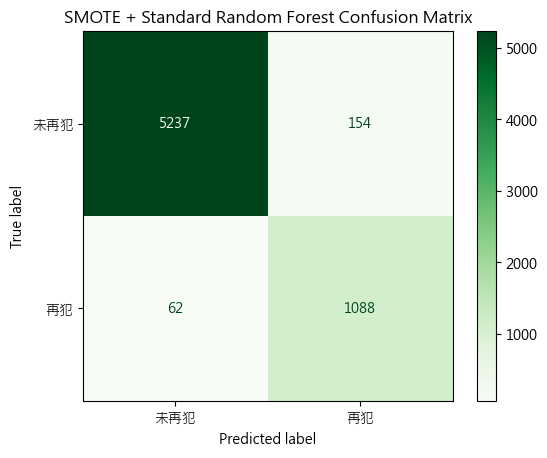

In [13]:
from imblearn.over_sampling import SMOTE

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=500, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('accuracy','f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean accuracy: %.4f' % mean(scores['test_accuracy']))
print('Mean f1: %.4f' % mean(scores['test_f1']))
print('Mean recall: %.4f' % mean(scores['test_recall']))
print('Mean precision: %.4f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['未再犯', '再犯'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
SMOTE_SRF = RandomForestClassifier(n_estimators=500, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('accuracy','f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, X_train_over, y_train_over, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean accuracy: %.4f' % mean(scores['test_accuracy']))
print('Mean f1: %.4f' % mean(scores['test_f1']))
print('Mean recall: %.4f' % mean(scores['test_recall']))
print('Mean precision: %.4f' % mean(scores['test_precision']))

Mean accuracy: 0.8587
Mean f1: 0.8598
Mean recall: 0.8669
Mean precision: 0.8529


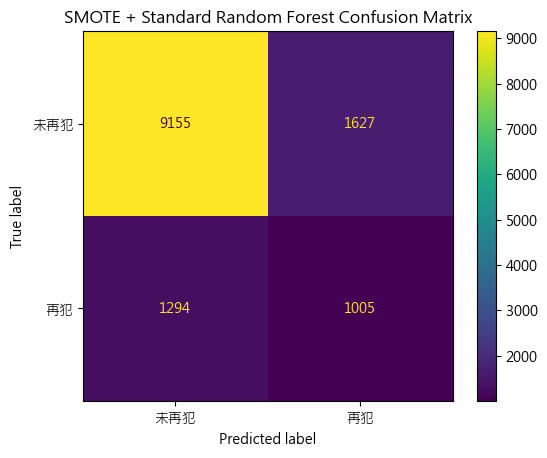

In [34]:

#Train SMOTE SRF
SMOTE_SRF.fit(X_train_over, y_train_over)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm, display_labels=['未再犯', '再犯'])
fig.plot()
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [15]:
#***roc_auc curve for SMOTERF***

from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
oversample = SMOTE()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
SMOTERF = RandomForestClassifier(n_estimators=500, random_state=0)

SMOTERF.fit(X_train, y_train)
y_pred_proba = SMOTERF.predict_proba(X_test)[:, 1]
y_pred = SMOTERF.predict(X_test)
smote_fpr, smote_tpr, _ = roc_curve(y_test, y_pred_proba)
smote_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(bsrf_auc)

0.7781


## cost-sentive 方法

In [35]:
st = time.time()
SRFB = RandomForestClassifier(n_estimators=500, class_weight="balanced", random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('accuracy', 'f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRFB, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean Accuracy %.4f' % mean(scores['test_accuracy']))
print('Mean f1: %.4f' % mean(scores['test_f1']))
print('Mean recall: %.4f' % mean(scores['test_recall']))
print('Mean precision: %.4f' % mean(scores['test_precision']))
et = time.time()
print("run time need %.4f" % (et-st))

Mean Accuracy 0.8348
Mean f1: 0.3623
Mean recall: 0.2670
Mean precision: 0.5637
run time need 681.3377


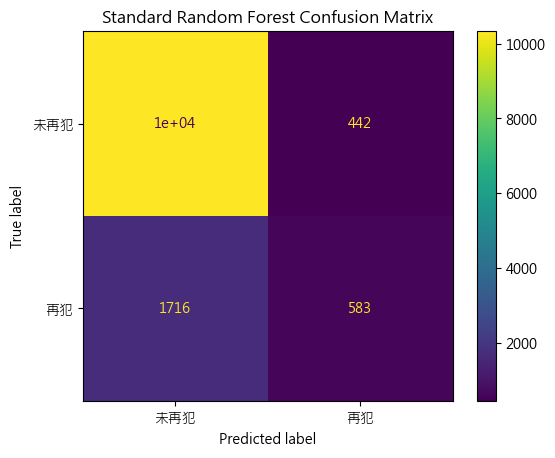

In [37]:
#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#Train SRF
SRFB.fit(X_train, y_train)
#SRF prediction result
y_pred = SRFB.predict(X_test)
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm, display_labels=['未再犯', '再犯'])
fig.plot()
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

## Easy Ensemble Classifier

In [5]:
from imblearn.ensemble import EasyEnsembleClassifier

In [8]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
eecm = EasyEnsembleClassifier(estimator=RandomForestClassifier(random_state=3),random_state=1)
eecm.fit(X_train, y_train)
y_pred = eecm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[9660 3846]
 [ 887 1958]]


In [9]:
from imblearn.ensemble import EasyEnsembleClassifier
st = time.time()
eecm = EasyEnsembleClassifier(estimator=RandomForestClassifier(random_state=3),random_state=1)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('accuracy', 'f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(eecm, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean Accuracy %.4f' % mean(scores['test_accuracy']))
print('Mean f1: %.4f' % mean(scores['test_f1']))
print('Mean recall: %.4f' % mean(scores['test_recall']))
print('Mean precision: %.4f' % mean(scores['test_precision']))
et = time.time()
print("run time need %.4f" % (et-st))

Mean Accuracy 0.7162
Mean f1: 0.4603
Mean recall: 0.6885
Mean precision: 0.3457
run time need 535.5620


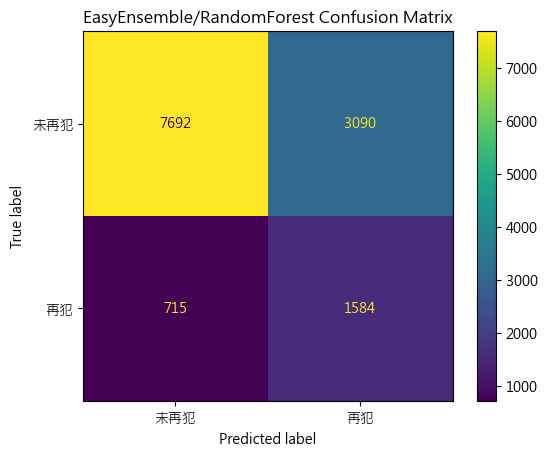

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#Train SRF
eecm.fit(X_train, y_train)
#SRF prediction result
y_pred = eecm.predict(X_test)
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = ConfusionMatrixDisplay(cm, display_labels=['未再犯', '再犯'])
fig.plot()
plt.title('EasyEnsemble/RandomForest Confusion Matrix')
plt.show()

In [16]:
#***roc_auc curve for EASYENSEMBLE***

from imblearn.ensemble import EasyEnsembleClassifier
eecm = EasyEnsembleClassifier(estimator=RandomForestClassifier(random_state=3),random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
eecm.fit(X_train, y_train)

y_pred_proba = eecm.predict_proba(X_test)[:, 1]
y_pred = eecm.predict(X_test)
eec_fpr, eec_tpr, _ = roc_curve(y_test, y_pred_proba)
eec_auc = round(roc_auc_score(y_test, y_pred_proba), 4)
print(eec_auc)

0.7781


Text(0, 0.5, 'tpr')

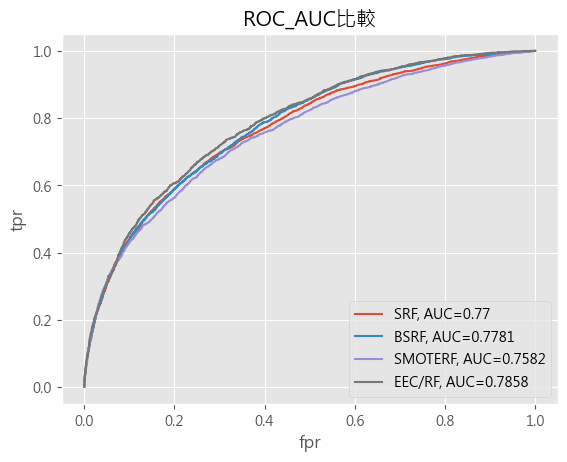

In [19]:
# plot ROC_AUC graph
plt.figure(0).clf()
plt.style.use("ggplot")

plt.plot(srf_fpr,srf_tpr,label="SRF, AUC="+str(srf_auc))
plt.plot(bsrf_fpr,bsrf_tpr,label="BSRF, AUC="+str(bsrf_auc))
plt.plot(smote_fpr,smote_tpr,label="SMOTERF, AUC="+str(smote_auc))
plt.plot(eec_fpr,eec_tpr,label="EEC/RF, AUC="+str(eec_auc))

plt.legend(loc=0)
plt.title("ROC_AUC比較")
plt.xlabel("fpr")
plt.ylabel("tpr")